In [17]:

import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
enhanced_news= pd.read_csv('../enhanced_news.csv')
enhanced_news.shape

(350, 10)

In [19]:
enhanced_news.head()

,Unique ID,URL,Date scraped,Headline,Body,Org,Topics,Sentiment,Scandal_distance,Top_10
0,1,https://www.bbc.com/sport/football/articles/cv...,2025-02-07,National League news - February 2025,BBC Sport tracks the latest news stories from ...,"['National League news -', 'BBC Sport', 'the N...",sport,0.9927,0.304,False
1,2,https://www.bbc.com/news/articles/cn0yp8e4ddlo,2025-02-08,South of England weekly news quiz,There has been plenty happening across the sou...,"['BBC Hampshire & Isle of Wight', 'Facebook', ...",sport,0.0772,0.210,False
2,3,https://www.bbc.com/news/articles/c9qj33n2e15o,2025-02-08,East of England news quiz of the week,From pigs on the loose to exercise classes wit...,"['Instagram', 'Facebook', 'BBC Beds', 'Herts &...",sport,-0.3182,0.198,False
3,4,https://www.bbc.com/news/articles/c93l71724dyo,2025-02-05,Kay Burley retires from Sky News after 36 years,Sky News presenter Kay Burley has announced sh...,"['Sky News', 'ITV', 'Sky']",entertainment,0.9961,0.316,False
4,5,https://www.bbc.com/news/articles/c0rq24090glo,2025-02-08,"Lasers, ladders and a leap: Photos of the week",A selection of news photographs from around th...,[],sport,0.0000,NaN,False


**Proportion of topics per day**

In [20]:

topic_counts = enhanced_news.groupby(['Date scraped', 'Topics']).size().reset_index(name='Count')

total_per_day = enhanced_news.groupby('Date scraped').size().reset_index(name='Total')

merged_df= pd.merge(topic_counts, total_per_day, on='Date scraped')
merged_df['proportion'] = merged_df['Count']/merged_df['Total']


#merged_df.to_csv("proportions_of_topics.csv", index=False )

merged_df

,Date scraped,Topics,Count,Total,proportion
0,2025-02-05,business,16,77,0.207792
1,2025-02-05,entertainment,26,77,0.337662
2,2025-02-05,politics,29,77,0.376623
3,2025-02-05,sport,5,77,0.064935
4,2025-02-05,tech,1,77,0.012987
5,2025-02-06,business,11,84,0.130952
6,2025-02-06,entertainment,31,84,0.369048
7,2025-02-06,politics,30,84,0.357143
8,2025-02-06,sport,11,84,0.130952
9,2025-02-06,tech,1,84,0.011905


**Sentiment per day**

In [21]:
def convert_sentiment(sentiment_score):
    if sentiment_score >= 0.05:
        return 'Positve'
    elif sentiment_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

enhanced_news['Sentiment_str'] = enhanced_news['Sentiment'].apply(convert_sentiment)
sentiment_per_day = enhanced_news.groupby(['Date scraped', 'Sentiment_str' ])['Sentiment_str'].size()
sentiment_per_day_df = sentiment_per_day.reset_index(name='Count')
#sentiment_per_day_df.to_csv("sentiment_per_day.csv", index=False)

sentiment_per_day_df

,Date scraped,Sentiment_str,Count
0,2025-02-05,Negative,30
1,2025-02-05,Positve,47
2,2025-02-06,Negative,37
3,2025-02-06,Positve,47
4,2025-02-07,Negative,42
5,2025-02-07,Neutral,3
6,2025-02-07,Positve,61
7,2025-02-08,Negative,13
8,2025-02-08,Neutral,1
9,2025-02-08,Positve,36


**Number of companies mentioned**

In [22]:
enhanced_news['Number_of_companies']= enhanced_news['Org'].apply(lambda list_org_str: len(eval(list_org_str)))

dict={}
dict_org={}
for _, row in enhanced_news.iterrows():
    org_list=eval(row['Org']) 
    date= row['Date scraped']
    
    for org in org_list:

        if date in dict_org and org not in dict_org.get(date):
            list=dict_org.get(date)
            list.append(org)
            dict_org[date]= list
    
            if date in dict.keys():
                counter = dict.get(date) + 1
                dict[date]= counter
            else :
                dict[date]= 1

        elif date not in dict_org :
            dict_org[date]= [org]
            dict[date]= 1
        

number_of_company= pd.DataFrame(dict.items(), columns=['Date scraped', 'Number_of_companies_per_day'])
number_of_company['Date scraped'] = pd.to_datetime(number_of_company['Date scraped'])

number_of_company.sort_values(by='Date scraped', inplace=True)

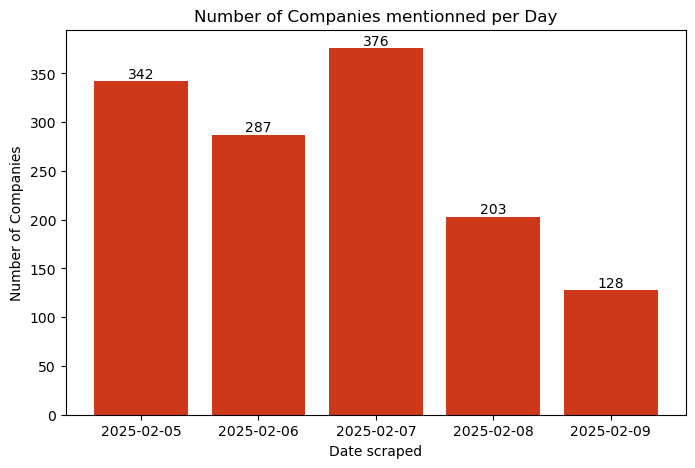

In [23]:
plt.figure(figsize=(8, 5))
bars = plt.bar(number_of_company['Date scraped'], number_of_company['Number_of_companies_per_day'], color='#cd3818')

# Add labels above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, str(int(yval)), ha='center', va='bottom')

# Add axis labels and a title
plt.xlabel('Date scraped')
plt.ylabel('Number of Companies')
plt.title('Number of Companies mentionned per Day')

# Save the plot before showing it
plt.savefig('number_of_Companies_mentioned_per_day.png')

# Show the plot
plt.show()